## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Approach:
Build a regression model using Advance regression methods like Ridge and Lasso regression to predict the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Model Objective:
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

## The steps performed to create the model are:
- Importing and understanding the data.
- Miising value treatment and outlier analysis
- Exploratory data analysis to find out the inference about the data and its correlation with the target variable.
- Tranformation of the target variable to handle the data skewness.
- Data preprocessing like Label encoding and creation of dummies.
- Test train split and Feature scaling
- Data modelling using RFE to identify the top 70 variables.
- Ridge and Lasso Regression to find the top feature variables and finding the optimal alpha value


   ###  Data Understanding
Let's now have a look at the dataset and understand the size, attribute names etc. in it.

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


In [2]:
# reading the dataset
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#info all the entire data along with types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#check missing percentage
percent_missing = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(20)


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [5]:
# Here we are dropping Columns with high missing values ,above 45%

housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [6]:
#checking missing value percentage 
percent_missing = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(20)

LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
PavedDrive       0.000000
WoodDeckSF       0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
dtype: float64

In [7]:
# Analysing missing values in Numeric cols 
housing[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [8]:
 #Treaing missing values by imputing for columns with missing values less than or equal to 45%

housing['LotFrontage']= housing.LotFrontage.fillna(housing.LotFrontage.median()) #Can see a presence of outlier so imputing the missing values through median
housing['MasVnrArea']= housing.MasVnrArea.fillna(housing.MasVnrArea.median())    # Can see presence of outlier so imputing the missing values through median
housing['GarageYrBlt']= housing.GarageYrBlt.fillna(housing.GarageYrBlt.mean())  # it looks stable with no outlier presence so we can use mean for imputation


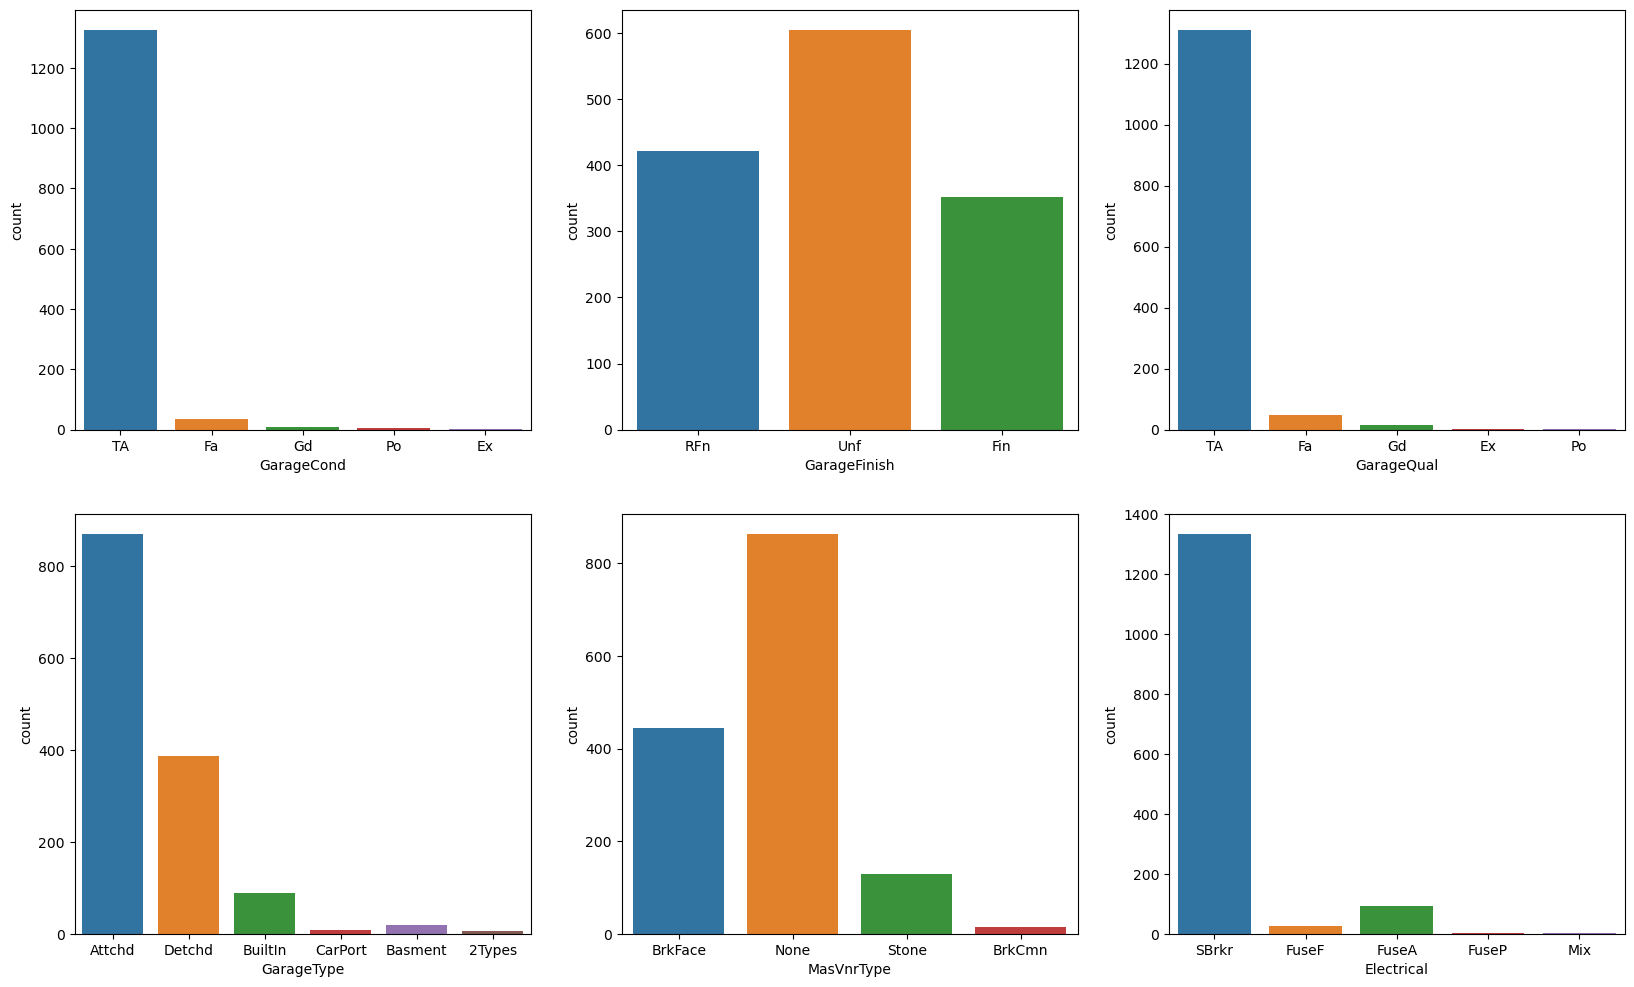

In [9]:
#Here we'll be visualising the categorical variables with missing values

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = housing)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = housing)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'MasVnrType', data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'Electrical', data = housing)
plt.show()

In [10]:
# The cases when house doesn't have the garage so replacing null with No Garrage

housing['GarageType'] = housing['GarageType'].replace(np.nan, 'No Garage')
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'No Garage')
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'No Garage')
housing['GarageQual'] = housing['GarageQual'].replace(np.nan, 'No Garage')
housing['MasVnrType'] = housing['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
housing['Electrical'] = housing['Electrical'].replace(np.nan, 'SBrkr') # replacing nan with the top option of this field


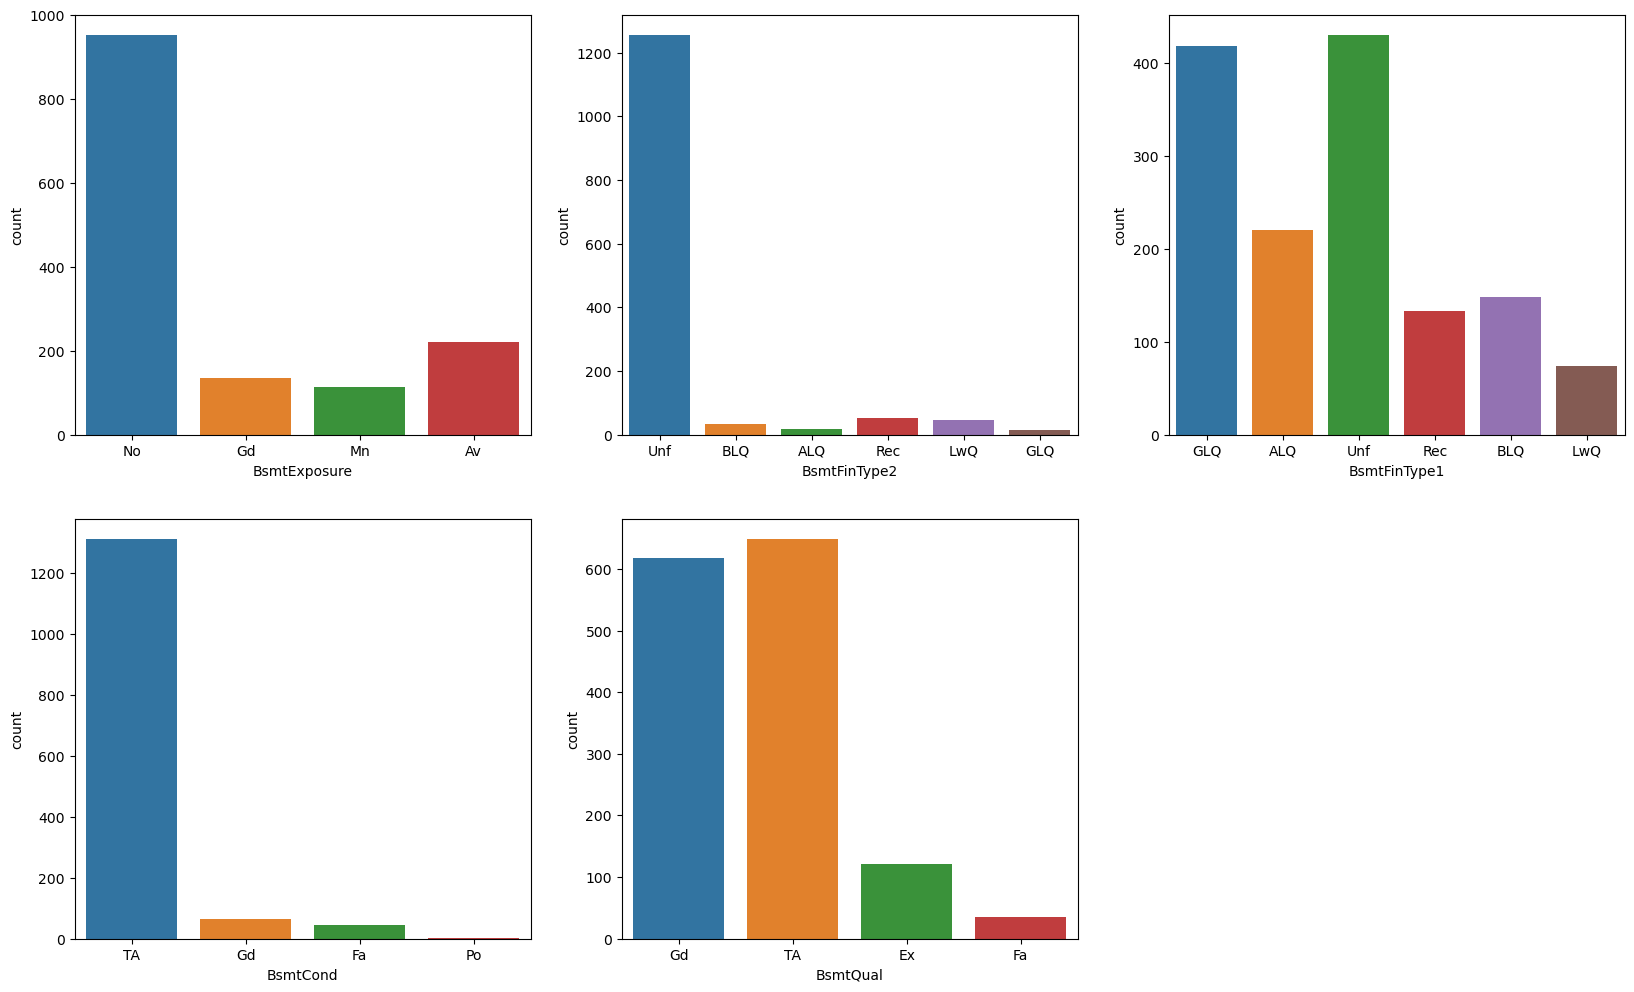

In [11]:
#visualising the remaining categorical variables with missing values
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = housing)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = housing)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = housing)

plt.show()

In [12]:
# The cases when house doesn't have the basement so replacing null with No Basement

housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'No Basement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'No Basement')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'No Basement')

In [13]:
percent_missing = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
dtype: float64

In [14]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### All the missing values has been treated 

### EDA

In [15]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

There are four columns which gives us details about the years of the construction. Deriving a new column Age of building and dropping the other columns. we take the remodel date because if the house is remodel it means they have made it better so it would not be right to take original date of built

In [16]:
housing['Age']=housing['YrSold']-housing['YearRemodAdd']
housing['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [17]:
housing=housing.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [18]:
housing.shape

(1460, 73)

Dropping the id as it does not give any infomration

In [19]:
housing=housing.drop(['Id'], axis = 1)

In [20]:
# Numerical columns of the datset 
numeric_df = housing.select_dtypes(include=['int64', 'float64'])
numeric_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age'],
      dtype='object')

### Outlier treatment

In [21]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
27,EnclosedPorch,14.25
7,BsmtFinSF2,11.44
4,OverallCond,8.56
29,ScreenPorch,7.95
1,LotFrontage,7.26
0,MSSubClass,7.05
5,MasVnrArea,6.71
15,BsmtHalfBath,5.62
26,OpenPorchSF,5.27
2,LotArea,4.73


**Comment:**
- Majority of the numeric features  have outliers
- Dropping all the outliers will cause loss of information.
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of **[25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]**
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' is excluded in this

In [22]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing[feature].quantile(.75) - housing[feature].quantile(.25) 
        max_value = housing[feature].quantile(.75)+1.5*IQR
        min_value = housing[feature].quantile(.25)-1.5*IQR
        housing[feature][housing[feature] > max_value] = max_value
        housing[feature][housing[feature] < min_value ] = min_value

In [23]:
# Checking the dataset after reassigning minmum and maximum values

housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000
mean,55.085616,69.090411,9647.388014,6.100685,5.543493,89.406336,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,0.0,1503.735873,0.425000,0.0,1.565068,0.382877,2.851712,1.0,6.487671,0.611301,1978.508561,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,180921.195890,22.950000
std,37.508183,17.231909,3594.356399,1.378430,0.963696,134.017553,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,0.0,481.375641,0.517373,0.0,0.550916,0.502885,0.759516,0.0,1.541916,0.638959,23.986908,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,79442.502883,20.640653
min,20.000000,31.500000,1481.500000,2.000000,3.500000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1903.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,34900.000000,-1.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,0.0,1129.500000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,129975.000000,4.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,0.0,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,163000.000000,14.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,0.0,1776.750000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,214000.000000,41.000000
max,145.000000,107.500000,17673.500000,10.000000,7.500000,410.625000,1780.625000,0.0,1685.500000,2052.000000,2155.125000,1820.000000,0.0,2747.625000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,2010.000000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,755000.000000,60.000000


Removing the features having fixed values as they won't contribute in predicting SalePrice

In [24]:
housing[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','KitchenAbvGr','BsmtFinSF2','BsmtHalfBath']].describe()

,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,KitchenAbvGr,BsmtFinSF2,BsmtHalfBath
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
housing.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','KitchenAbvGr','BsmtFinSF2','BsmtHalfBath'], axis=1, inplace=True)

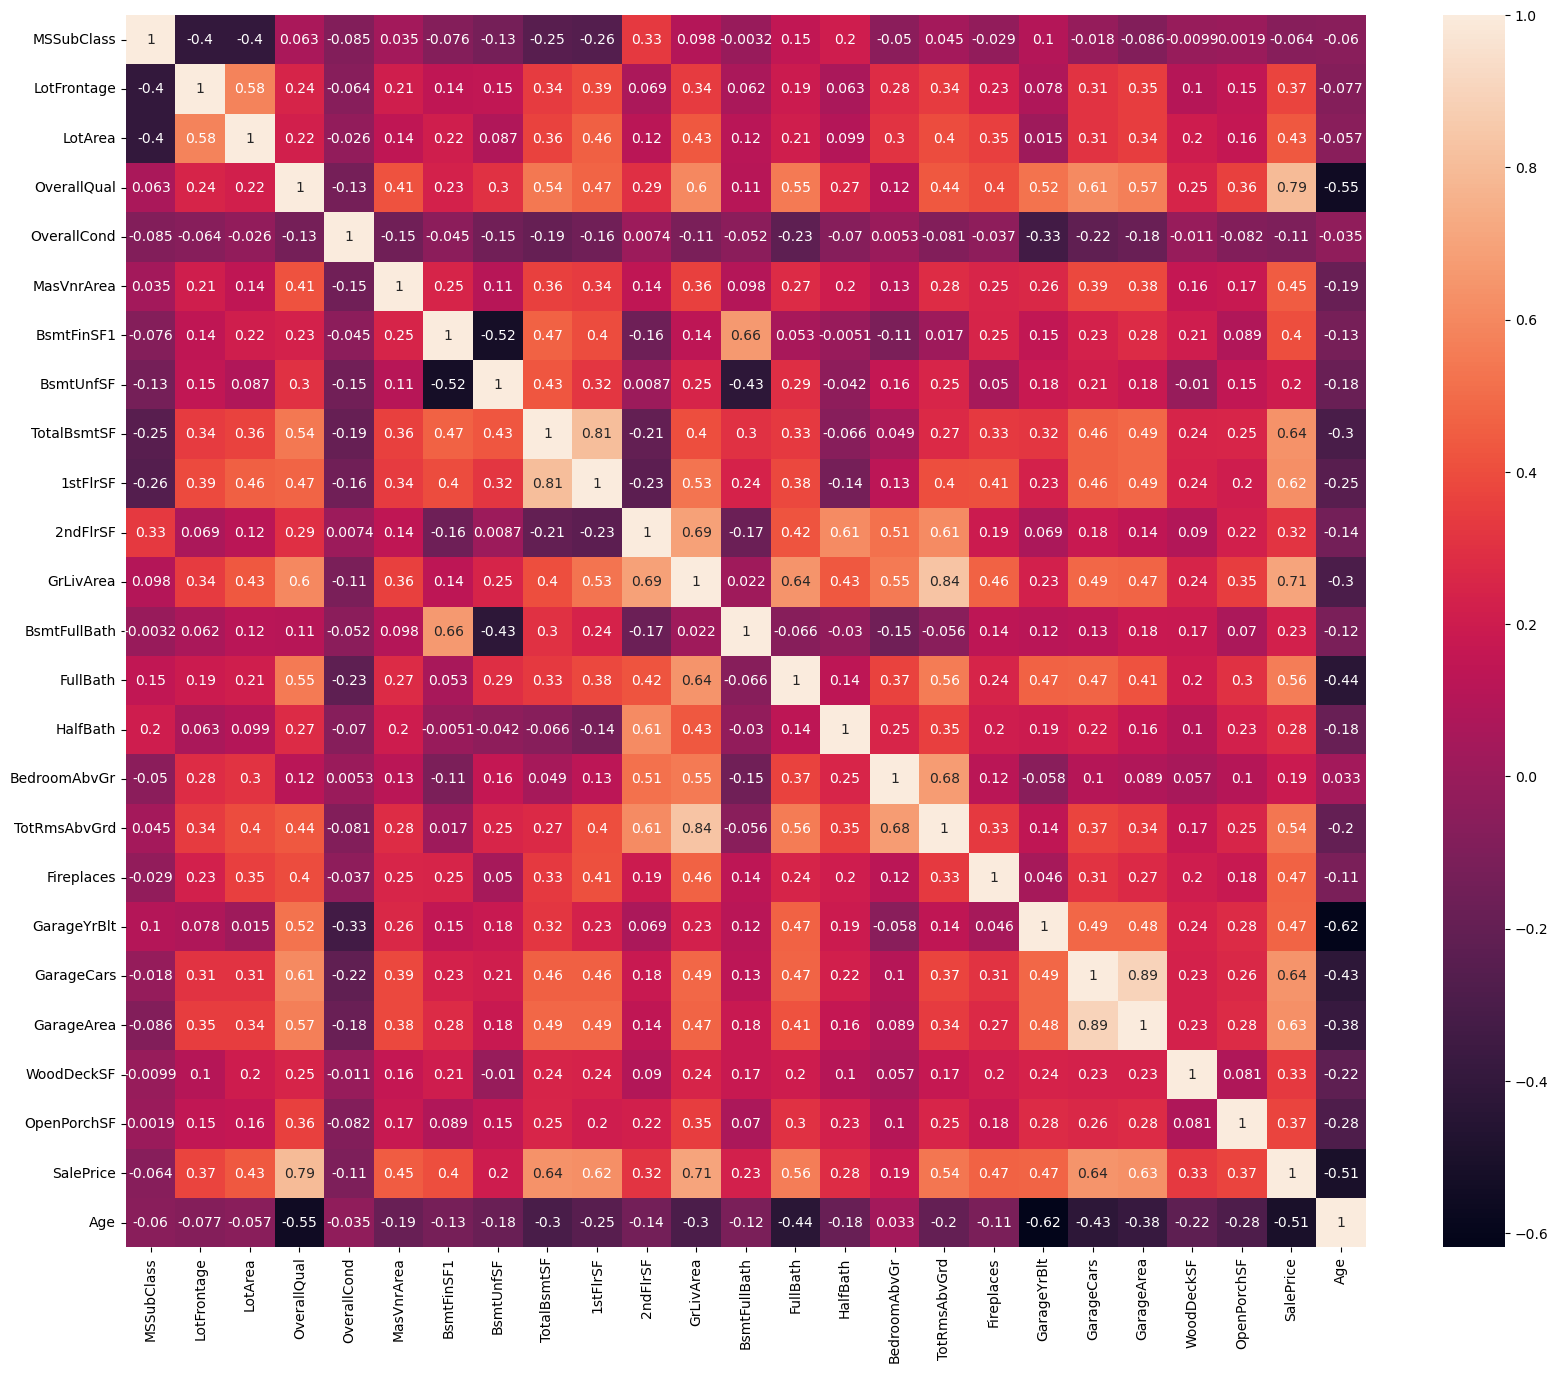

In [26]:
numeric_df = housing.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

Inferences: 
Based on the correlation we can make few following interpretions
- SalePrice is positively correlated to the Overall Quality
- SalePrice is positively correlated to the 1stFlrSF 
- SalePrice is positively correlated to the TotalBsmtSF 
- SalePrice is positively correlated to the GrLivArea 
- SalePrice is positively correlated to the FullBath
- SalePrice is positively correlated to the TotRmsAbvGrd
- SalePrice is positively correlated to the GarageCars
- SalePrice is positively correlated to the GarageArea
- SalePrice is negatively correlated to the Age

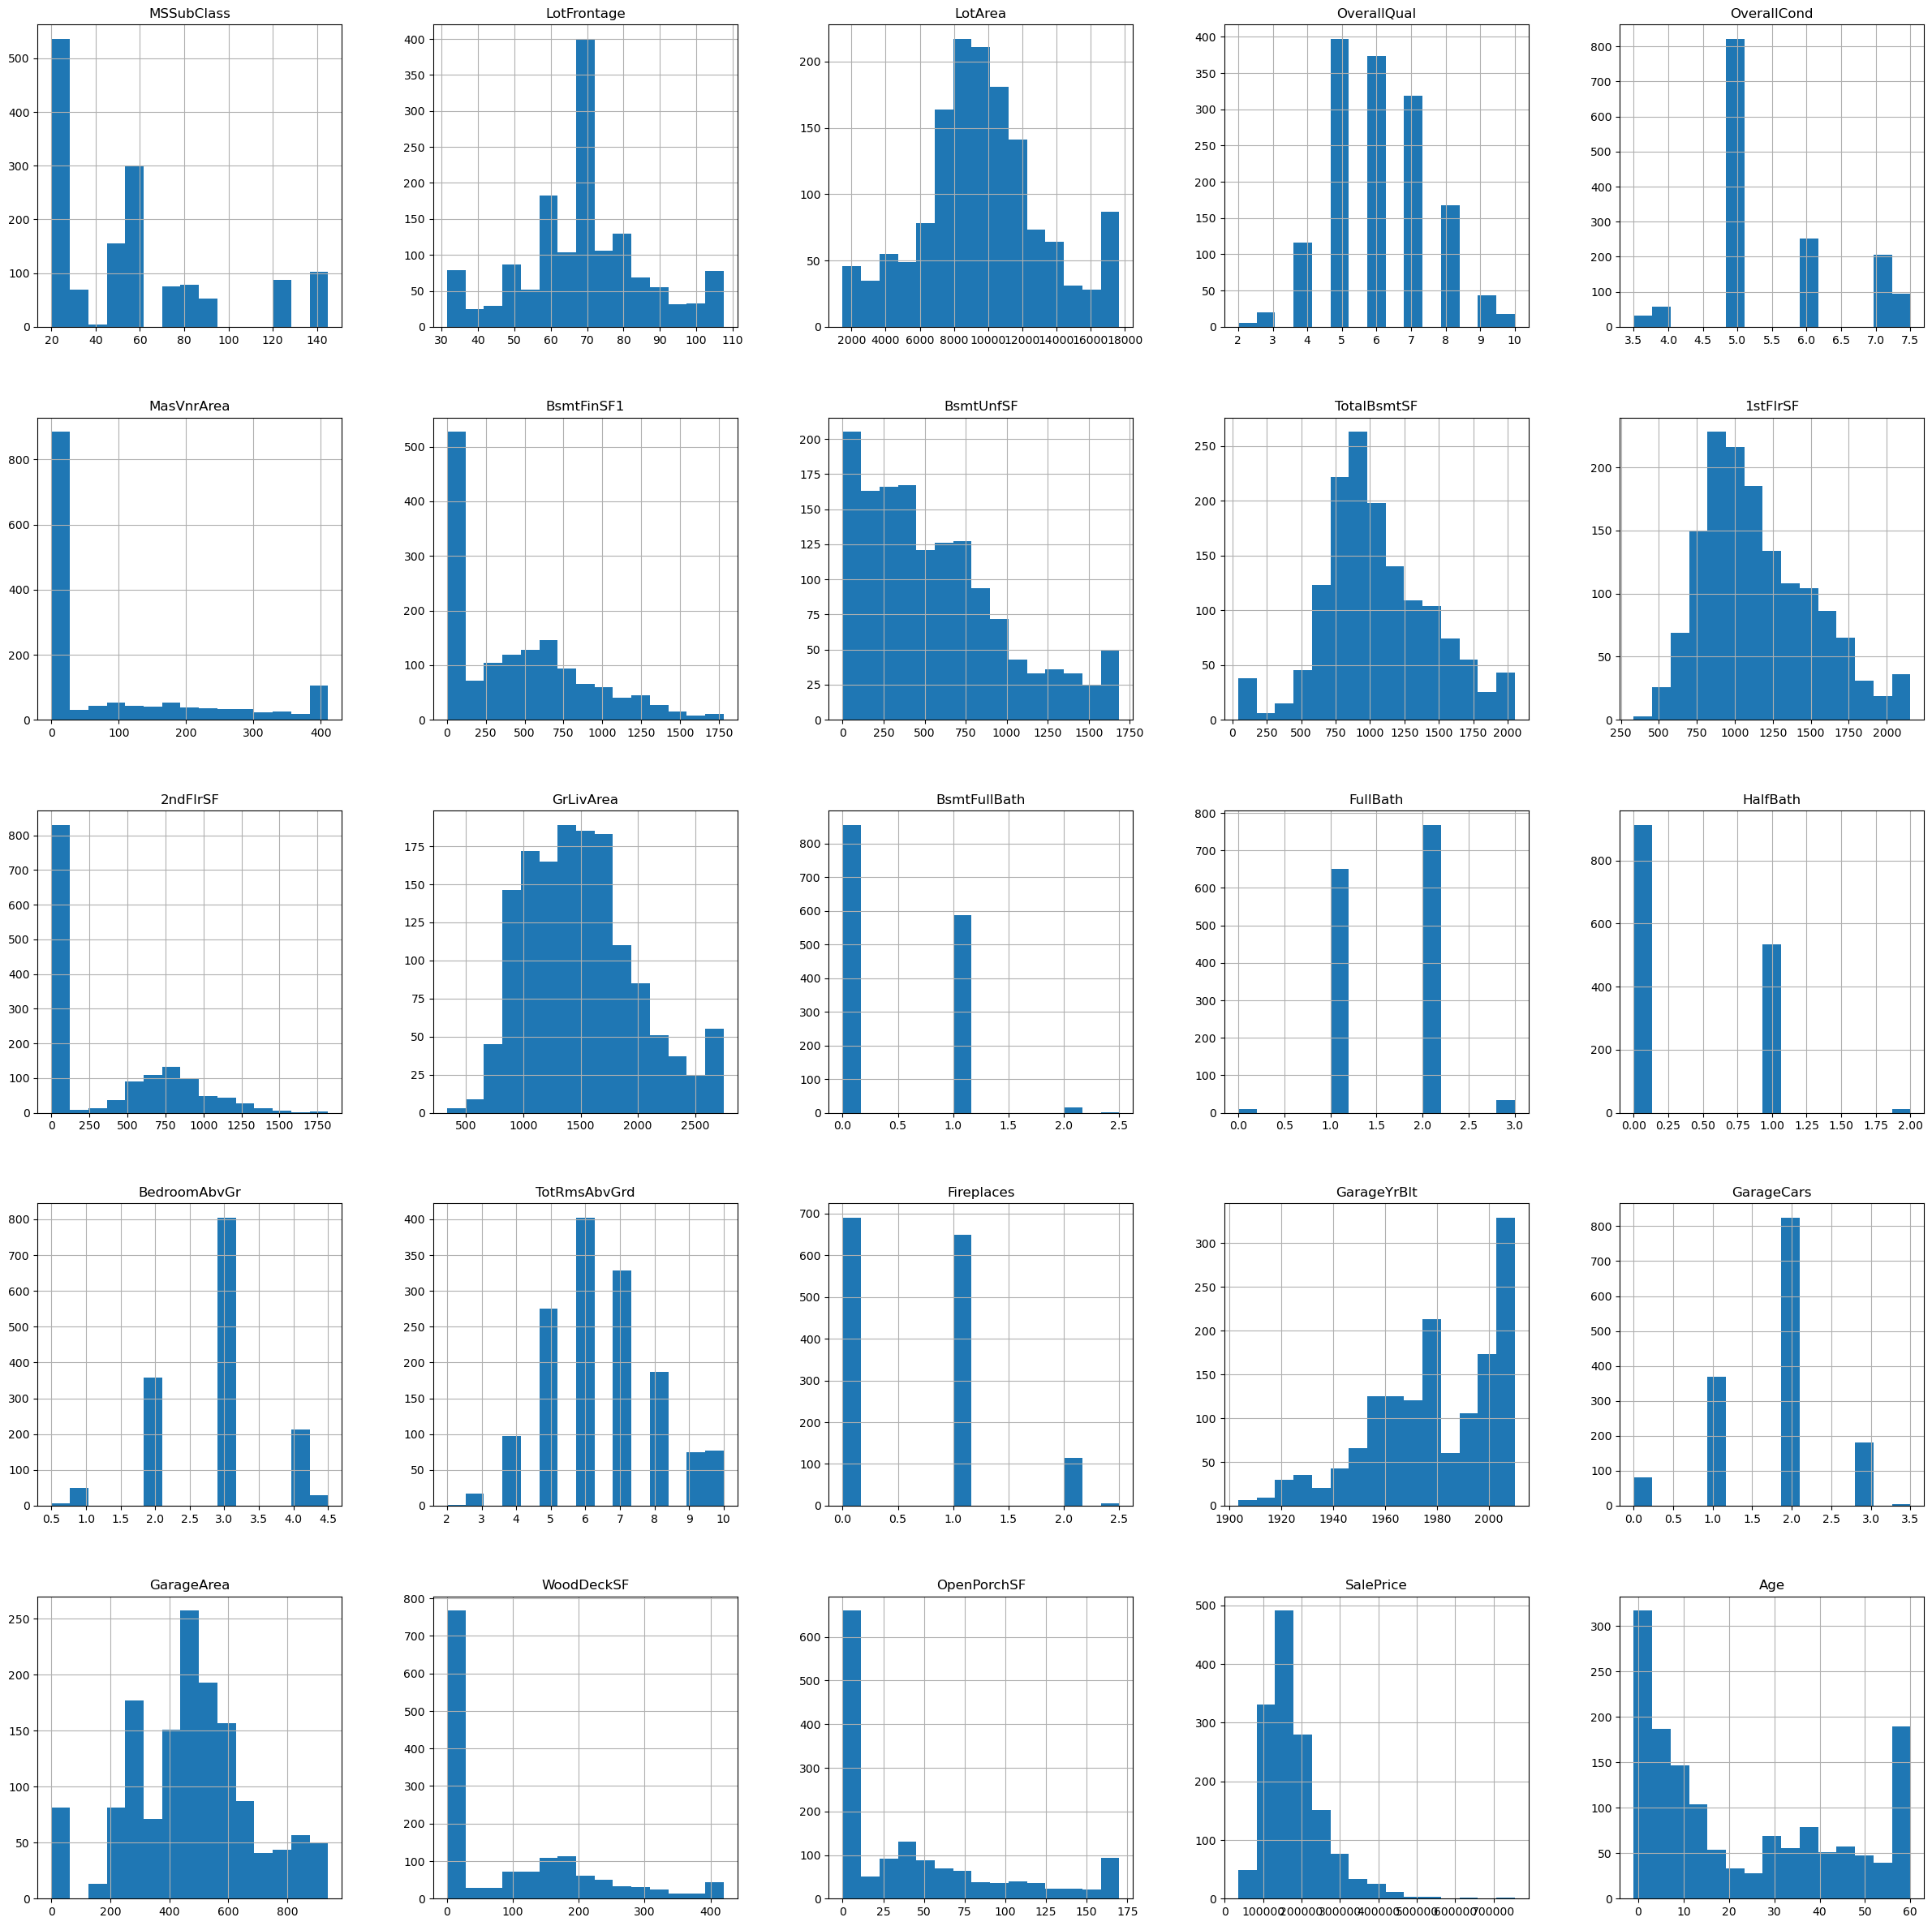

In [27]:
#univariate analysis of numerical cols 
numeric_cols = housing.dtypes[housing.dtypes != "object"].index
housing[numeric_cols].hist(bins=15, figsize=(30, 30))
plt.show()

We see that few variables are highly skewed and there might be possiblity that they can be correlated with each other as well so it is very difficlut to interpret from univariate analysis. 

### Bivariate analysis of these top 10 correlated variables with saleprice using pairplot

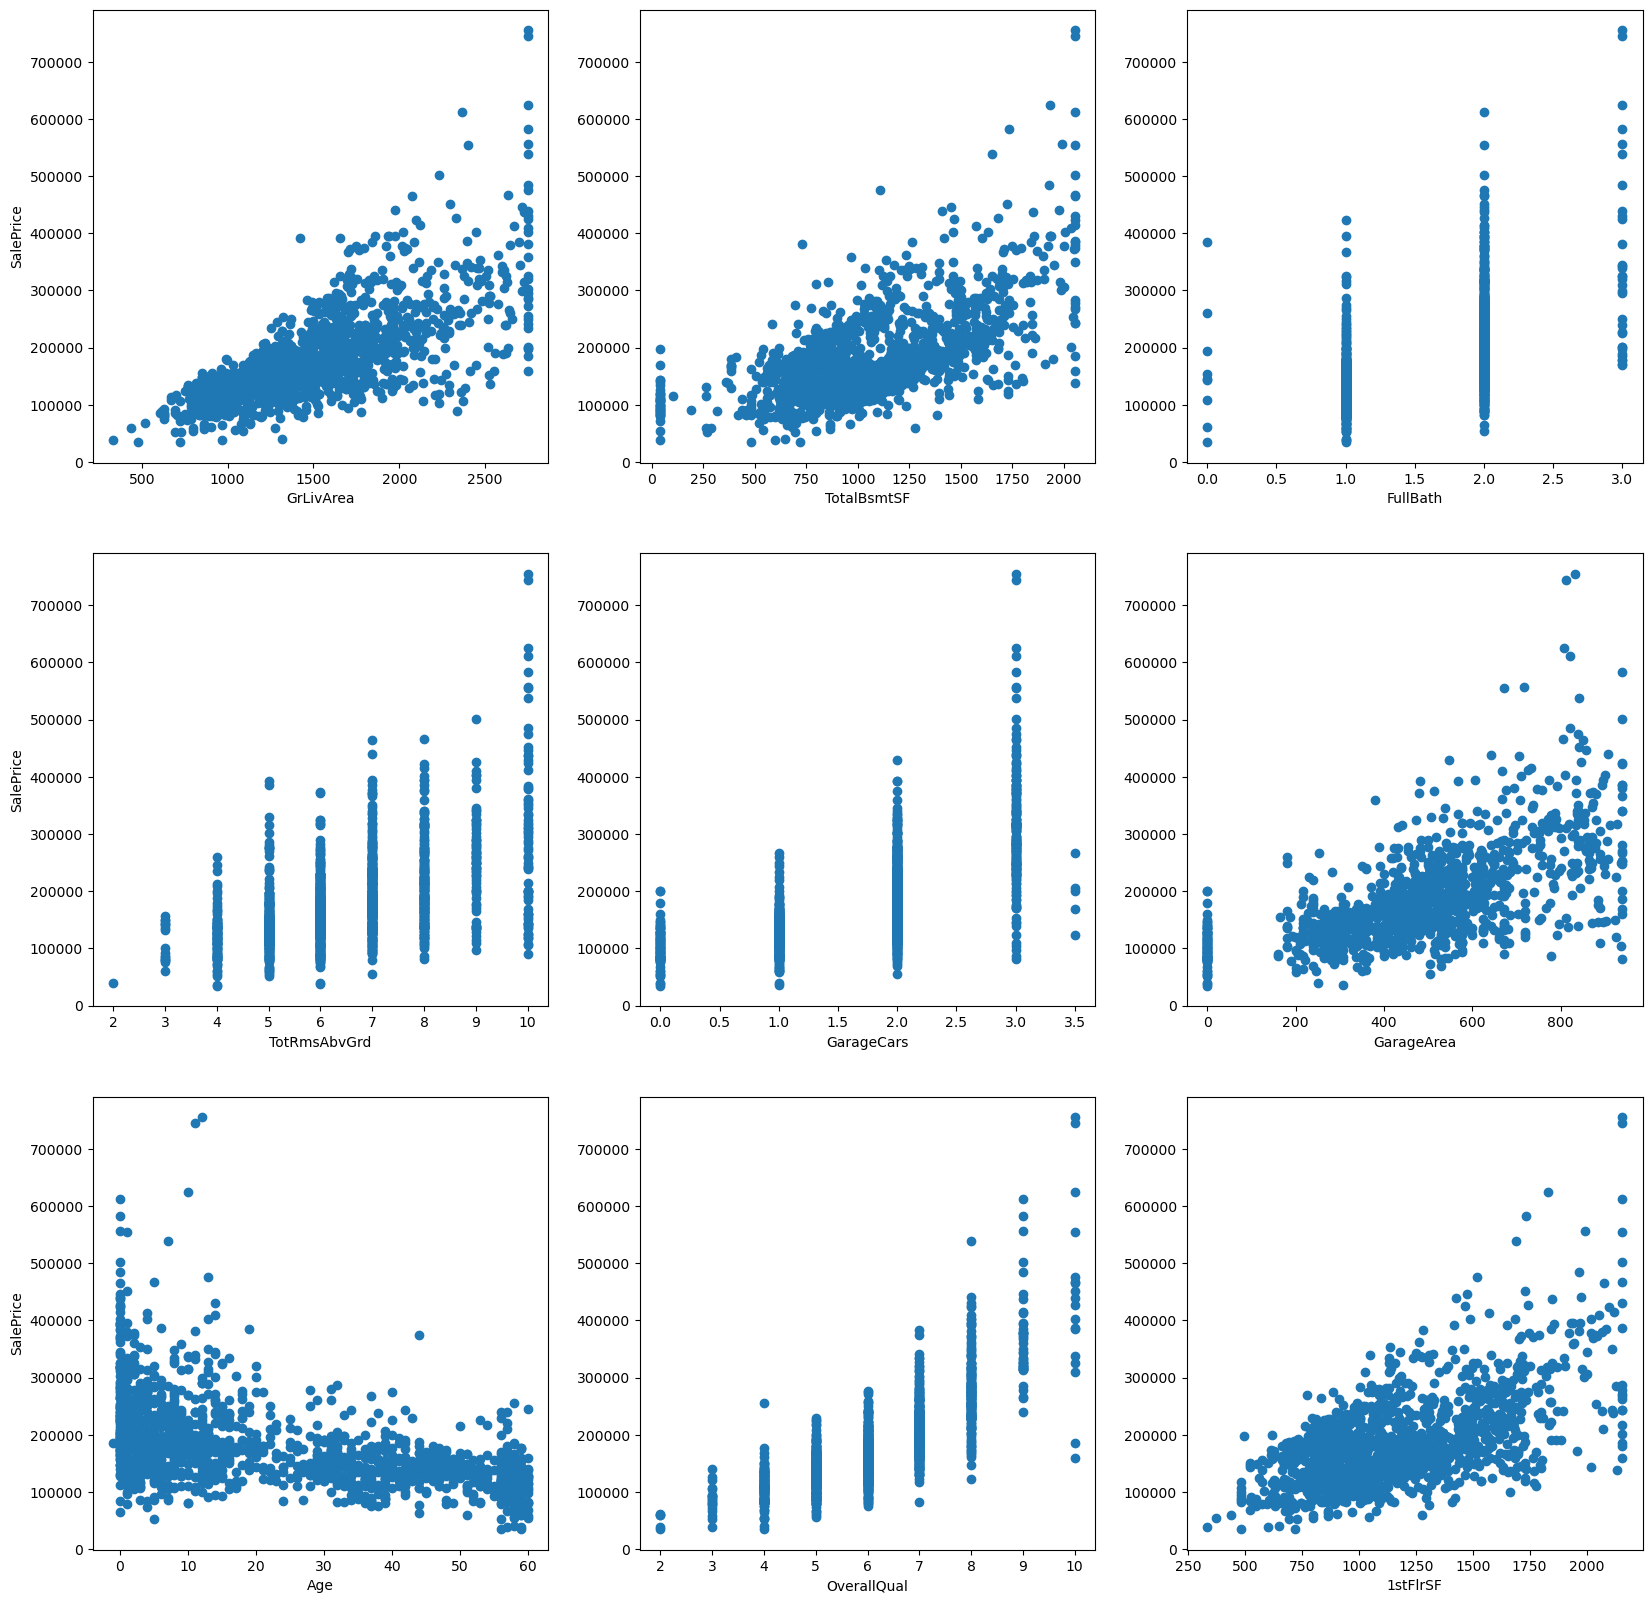

In [28]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
plt.scatter(housing.GrLivArea, housing.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,2)
plt.scatter(housing.TotalBsmtSF, housing.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.subplot(3,3,3)
plt.scatter(housing.FullBath, housing.SalePrice)
plt.xlabel('FullBath')
plt.subplot(3,3,4)
plt.scatter(housing.TotRmsAbvGrd, housing.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,3,5)
plt.scatter(housing.GarageCars, housing.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,3,6)
plt.scatter(housing.GarageArea, housing.SalePrice)
plt.xlabel('GarageArea')
plt.subplot(3,3,7)
plt.scatter(housing.Age, housing.SalePrice)
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.subplot(3,3,8)
plt.scatter(housing.OverallQual, housing.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,3,9)
plt.scatter(housing['1stFlrSF'], housing.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()

Inferences : 
- We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.
- We even observe that some variables like FullBath, GarageCars are not continuously distributed so we can encode them according to their characteritics. 

In [29]:
#changing the num to categorical so as to form these as dummy variables 
housing['MSSubClass']=housing['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

housing['OverallQual']=housing['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
housing['OverallCond']=housing['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [30]:
#Let's check the dependent variable i.e SalePrice
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

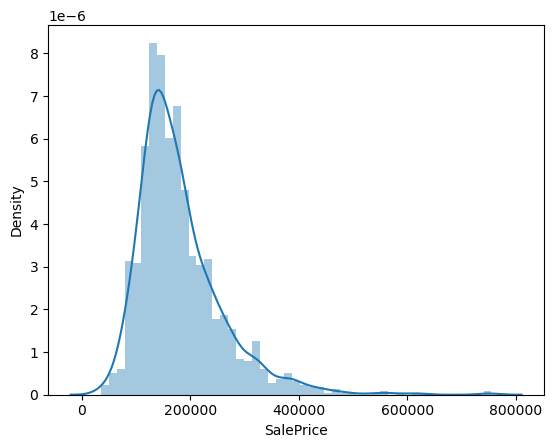

In [31]:
sns.distplot(housing['SalePrice']) #it's skewed 

In [32]:
#skewness and kurtosis
print("Skewness: %f" % housing['SalePrice'].skew())

Skewness: 1.882876


In [33]:
housing['SalePrice']=np.log(housing.SalePrice) #tranforming to form normal disribution

In [34]:
housing['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

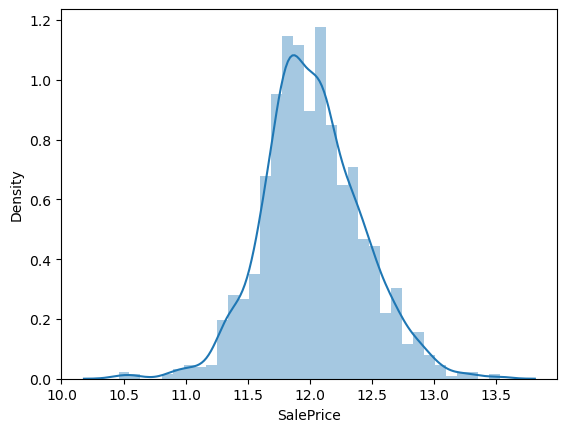

In [35]:
sns.distplot(housing['SalePrice']) # Normally distributed now

In [36]:
#skewness 
print("Skewness: %f" % housing['SalePrice'].skew())

Skewness: 0.121335


Now it can be said that the dependent variable SalePrice is normally distributed.

Now let's check the Categorical columns and their effect on price

In [37]:
Categorical_cols = housing.select_dtypes(include=['object'])
Categorical_cols.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

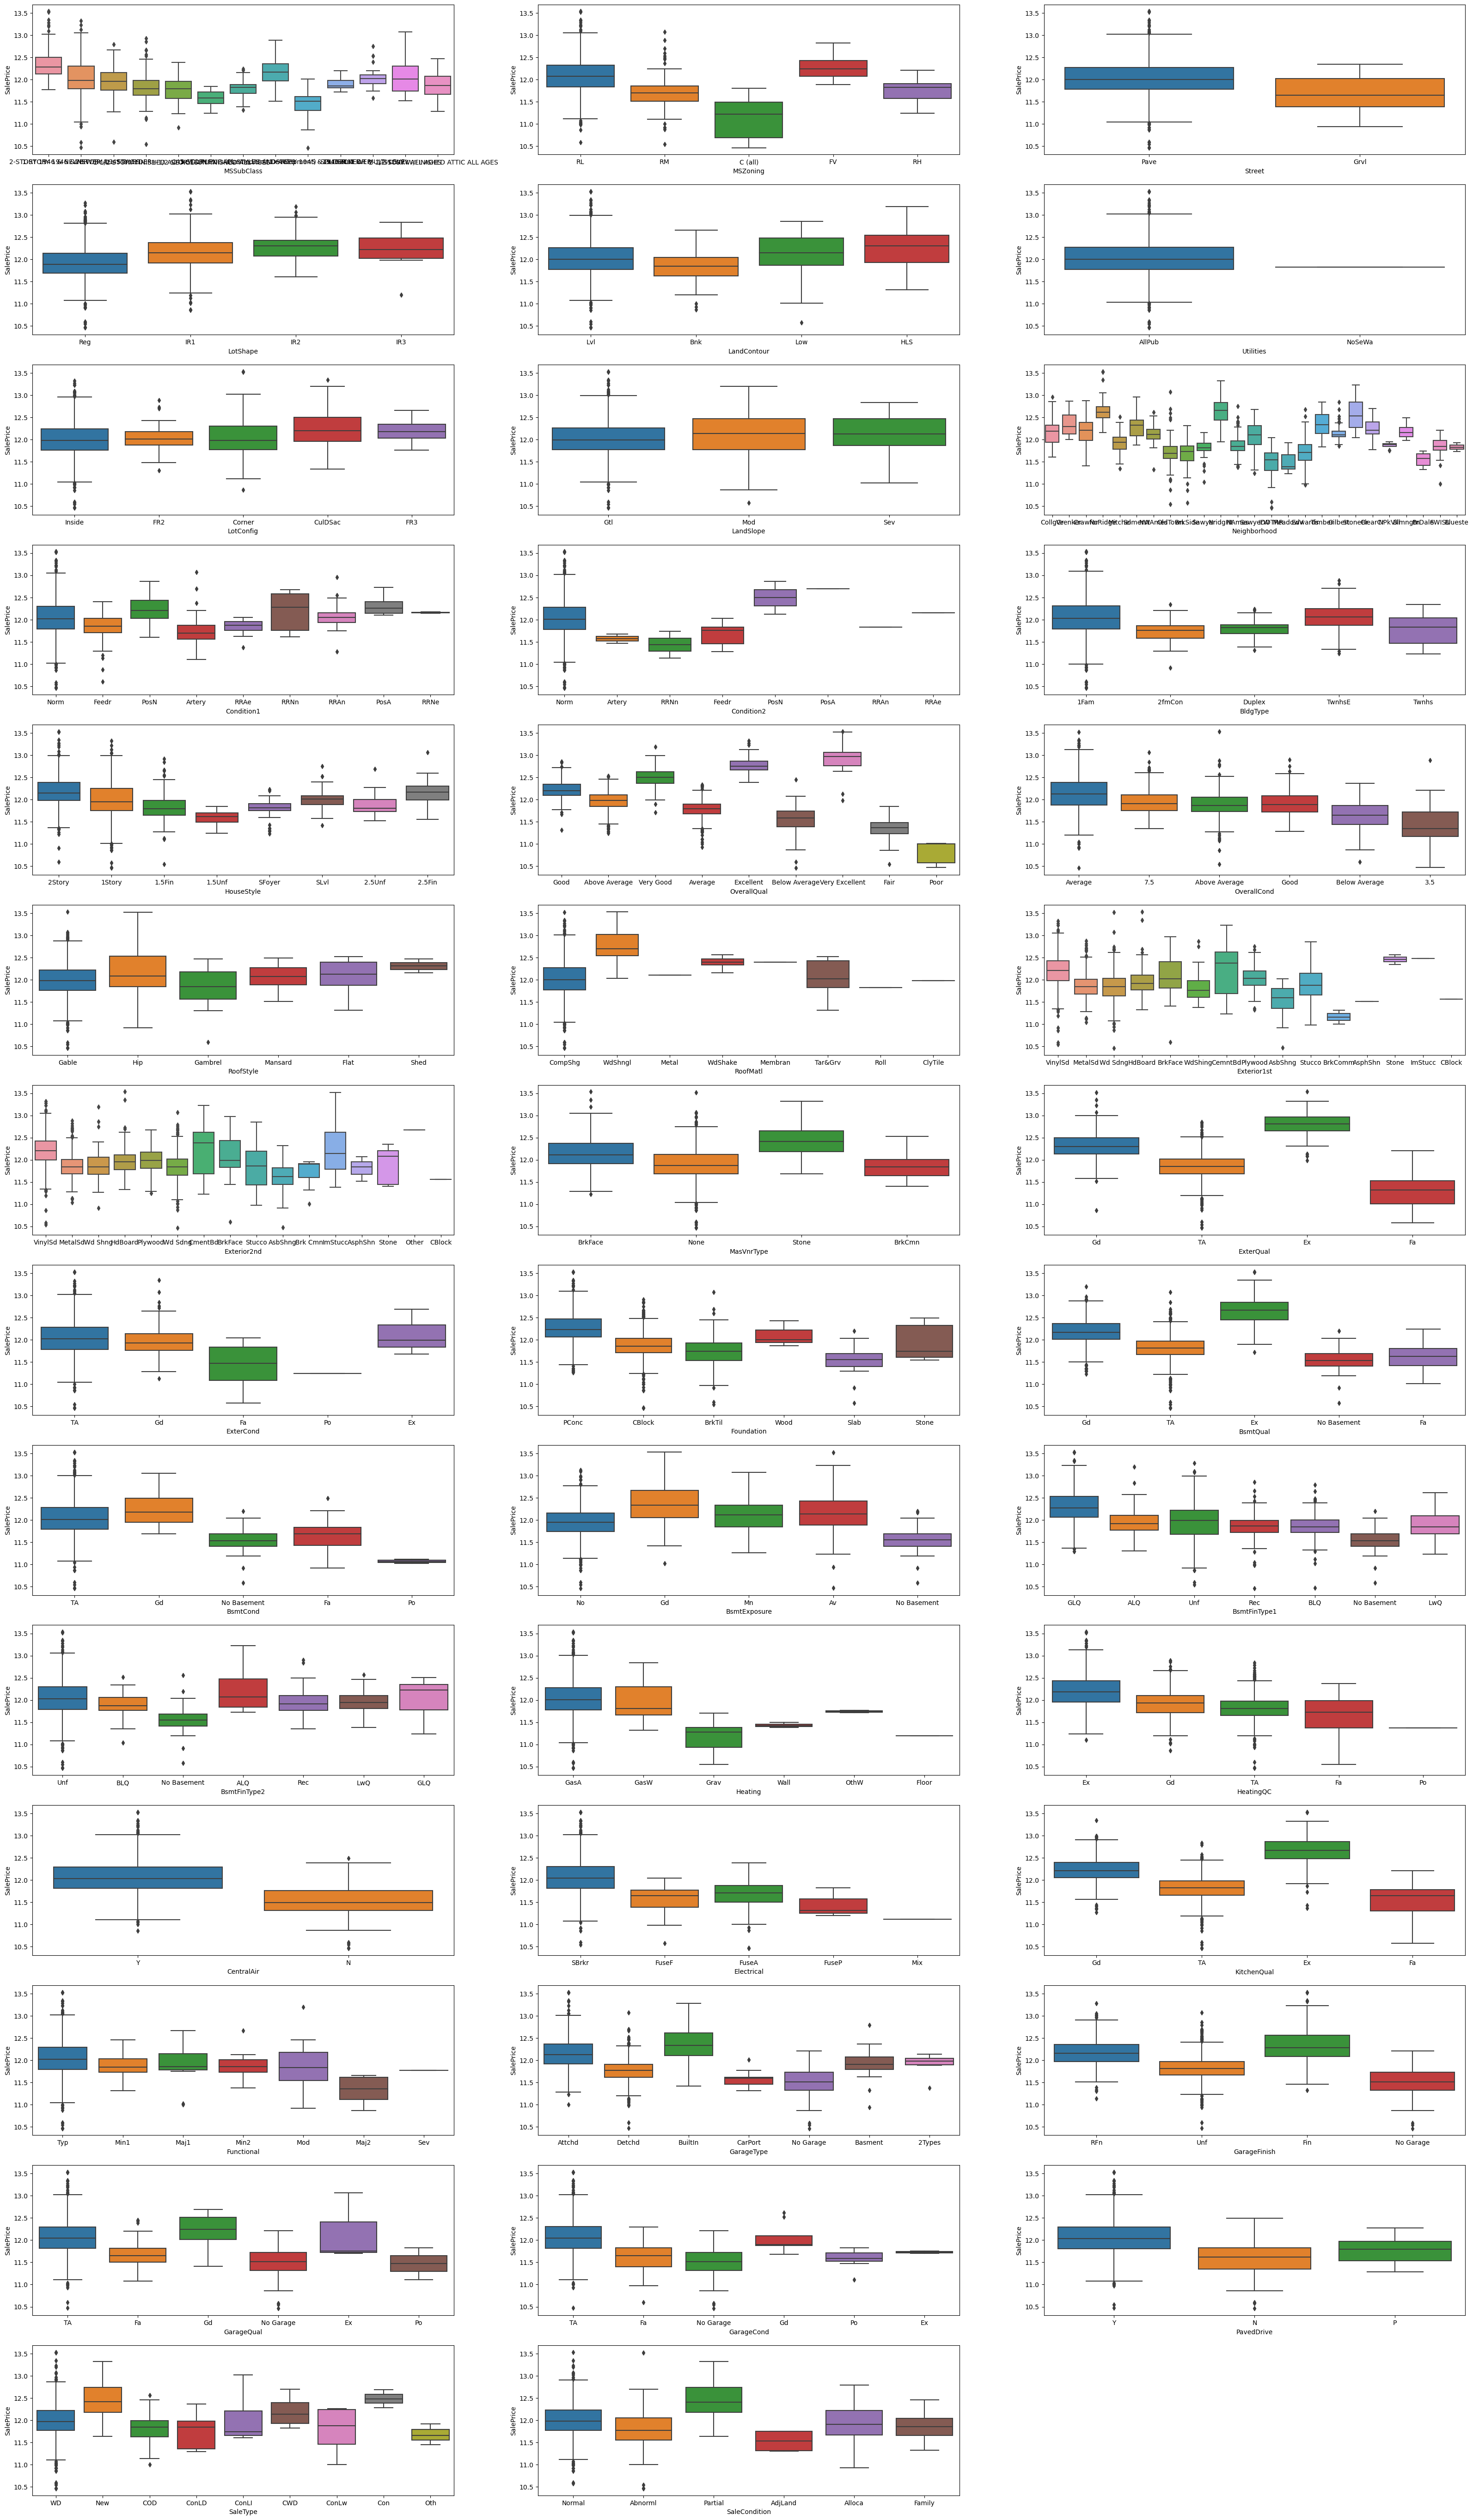

In [38]:
# Building boxplots for each categories with the help of subplots.
# We'll be using 'SalePrice' as target variable and all the categories as independent variables.
vars_cat = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition']
plt.figure(figsize=(40, 70))
for i in enumerate(vars_cat):
    plt.subplot(14,3,i[0]+1)
    sns.boxplot(data=housing, x=i[1], y='SalePrice')
plt.show()

Inferences - 
- MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
- The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
- the utlities coulms have most of its values as 'AllPub' So we this column have give much of an informration. - ITs not an important feature.
- The house with Exterior Quality of type Execellent has the highest SalePrice.
- The house with Basement Quality of type Execellent has the highest SalePrice.
- The house with Kitchen Quality of type Execellent has the highest SalePrice.
- The house with Garage Quality of type Execellent has the highest SalePrice.
- The house with Garage Type of type BuiltIn has the highest SalePrice.
- The house with Sale Type of type New has the highest SalePrice.
- The Central air of type 'Yes' has more Sale Price when compared to 'No'

In [39]:
# Creating dummies variables for the categorical variables 
dummy = pd.get_dummies(housing[vars_cat], drop_first=True)
dummy.head()

,MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,...,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


Comment:

Adding 230 features to the existing dataset will make the model very complex.
From the above boxplots, for some categorical features only label is dominating over others.
In dummy any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [40]:
dummies_to_drop = []
for feat in dummy.columns:
    if dummy[feat].value_counts()[0]/dummy.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES', 'MSSubClass_1-STORY 1945 & OLDER', 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', 'MSSubClass_2-1/2 STORY ALL AGES', 'MSSubClass_2-STORY 1945 & OLDER', 'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'MSSubClass_SPLIT FOYER', 'MSSubClass_SPLIT OR MULTI-LEVEL', 'MSZoning_FV', 'MSZoning_RH', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Fe

In [41]:
# Dropping the highly imbalanced dummy variables

dummy = dummy.drop(dummies_to_drop, axis=1)

print(dummy.shape)

(1460, 91)


In [42]:
# concat the dummy variables with themain dataset
housing = pd.concat([housing, dummy], axis=1) 

In [43]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_GasA,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_No Garage,GarageQual_TA,GarageCond_No Garage,GarageCond_TA,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856,GasA,Ex,Y,SBrkr,856.0,854,1710.0,1.0,2,1,3.0,Gd,8,Typ,0.0,Attchd,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,7.5,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262,GasA,Ex,Y,SBrkr,1262.0,0,1262.0,0.0,2,0,3.0,TA,6,Typ,1.0,Attchd,...,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0
2,2-STORY 1946 & NEWER,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920,GasA,Ex,Y,SBrkr,920.0,866,1786.0,1.0,2,1,3.0,Gd,6,Typ,1.0,Attchd,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0
3,2-STORY 1945 & OLDER,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756,GasA,Gd,Y,SBrkr,961.0,756,1717.0,1.0,1,0,3.0,Gd,7,Typ,1.0,Detchd,...,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0
4,2-STORY 1946 & NEWER,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145,GasA,Ex,Y,SBrkr,1145.0,1053,2198.0,1.0,2,1,4.0,Gd,9,Typ,1.0,Attchd,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0


In [44]:
#removing columns as dummy variables already formed
housing.drop(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],axis=1,inplace=True) 

In [45]:
housing.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2-STORY 1946 & NEWER,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Reg,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,OverallQual_Average,OverallQual_Below Average,OverallQual_Good,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_GasA,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_No Garage,GarageQual_TA,GarageCond_No Garage,GarageCond_TA,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,196.0,706.0,150.0,856,856.0,854,1710.0,1.0,2,1,3.0,8,0.0,2003.0,2.0,548.0,0,61,12.247694,5,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0
1,80.0,9600.0,0.0,978.0,284.0,1262,1262.0,0,1262.0,0.0,2,0,3.0,6,1.0,1976.0,2.0,460.0,298,0,12.109011,31,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0
2,68.0,11250.0,162.0,486.0,434.0,920,920.0,866,1786.0,1.0,2,1,3.0,6,1.0,2001.0,2.0,608.0,0,42,12.317167,6,0,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0
3,60.0,9550.0,0.0,216.0,540.0,756,961.0,756,1717.0,1.0,1,0,3.0,7,1.0,1998.0,3.0,642.0,0,35,11.849398,36,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0
4,84.0,14260.0,350.0,655.0,490.0,1145,1145.0,1053,2198.0,1.0,2,1,4.0,9,1.0,2000.0,3.0,836.0,192,84,12.429216,8,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0


In [46]:
# Putting feature variable to X
X = housing.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2-STORY 1946 & NEWER,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Reg,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,OverallQual_Average,OverallQual_Below Average,OverallQual_Good,OverallQual_Very Good,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_GasA,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_No Garage,GarageQual_TA,GarageCond_No Garage,GarageCond_TA,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,196.0,706.0,150.0,856,856.0,854,1710.0,1.0,2,1,3.0,8,0.0,2003.0,2.0,548.0,0,61,5,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0
1,80.0,9600.0,0.0,978.0,284.0,1262,1262.0,0,1262.0,0.0,2,0,3.0,6,1.0,1976.0,2.0,460.0,298,0,31,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0
2,68.0,11250.0,162.0,486.0,434.0,920,920.0,866,1786.0,1.0,2,1,3.0,6,1.0,2001.0,2.0,608.0,0,42,6,0,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0
3,60.0,9550.0,0.0,216.0,540.0,756,961.0,756,1717.0,1.0,1,0,3.0,7,1.0,1998.0,3.0,642.0,0,35,36,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0
4,84.0,14260.0,350.0,655.0,490.0,1145,1145.0,1053,2198.0,1.0,2,1,4.0,9,1.0,2000.0,3.0,836.0,192,84,8,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0


In [47]:
# Putting response variable to y
y = housing['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [48]:
#Split the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)

(1021, 112)
(438, 112)


In [49]:
#Scaling the numerical columns 
scaler=MinMaxScaler()
numeric_cols = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2-STORY 1946 & NEWER,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Reg,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,OverallQual_Average,OverallQual_Below Average,OverallQual_Good,OverallQual_Very Good,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_GasA,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_No Garage,GarageQual_TA,GarageCond_No Garage,GarageCond_TA,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
210,0.467105,0.254601,0.00000,0.262829,0.234945,0.408955,0.275920,0.000000,0.184446,0.4,0.333333,0.0,0.375,0.285714,0.0,0.704283,0.000000,0.000000,0.000000,0.000000,0.967213,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
318,0.769737,0.519917,0.62344,0.554300,0.213586,0.649254,0.560813,0.700000,0.955999,0.4,0.666667,0.5,0.875,0.857143,0.4,0.840376,0.857143,0.699174,0.809524,0.352941,0.278689,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
239,0.269737,0.448339,0.00000,0.052790,0.380303,0.344776,0.238906,0.378571,0.454186,0.0,0.333333,0.5,0.625,0.571429,0.4,0.427230,0.285714,0.234479,0.000000,0.823529,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
986,0.361842,0.236444,0.00000,0.000000,0.287748,0.220398,0.352751,0.348352,0.518266,0.0,0.333333,0.0,0.375,0.285714,0.0,0.436620,0.285714,0.271783,0.938095,0.000000,0.065574,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1416,0.375000,0.608850,0.00000,0.000000,0.460991,0.365672,0.490151,0.573626,0.801862,0.0,0.666667,0.0,0.875,1.000000,0.0,0.633803,0.571429,0.596856,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,

In [50]:
X_test[numeric_cols]=scaler.transform(X_test[numeric_cols])

## RFE 

In [51]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
#Coefficients , intercepts

print(lm.coef_)
print(lm.intercept_)

[ 2.51039250e-02  1.29232372e-01 -1.69180449e-03 -2.80690855e-02
 -1.32396075e-01  4.15981958e-01  2.33003005e-01  2.64701451e-01
  3.72874921e-01  5.67224409e-02  6.62905127e-02  2.18870074e-02
 -3.28848592e-04 -7.04691357e-03  8.54969053e-02  4.61388125e-03
  1.46947999e-01  9.16046987e-03  3.34750117e-02  1.28426845e-02
 -7.97410959e-02 -2.61083375e-03  7.29401109e-02  9.48259728e-02
 -1.53858412e-02  9.57322388e-02  3.44391730e-02  5.97126195e-02
 -1.95133118e-03  3.02549535e-03  4.11419469e-02  4.86390406e-03
 -5.40152967e-03 -9.86740680e-02 -8.15474806e-03 -3.01972118e-02
  8.01101677e-02 -6.64275955e-02 -5.45325340e-02  1.66677059e-01
  1.32916973e-03  6.69268959e-02  1.16791233e-01  5.98579422e-03
 -6.51287608e-02 -1.08030525e-02 -9.88861443e-03 -5.66964941e-02
  3.81344674e-02  8.07609754e-02  1.78239467e-01  1.16108960e-01
  6.62347428e-02  1.53090983e-01 -2.34069366e-02 -2.01826551e-02
  8.05901012e-03 -5.36174300e-02 -8.15858440e-02 -5.29125732e-02
 -3.67601257e-02 -4.91919

In [53]:
# Import RFE

from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm, n_features_to_select=70)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)

[ True  True False False  True  True  True  True  True  True  True False
 False False  True False  True False  True False  True False  True  True
 False  True  True  True False False  True False False  True False  True
  True  True  True  True False  True  True False  True False False  True
  True  True  True  True  True  True False False False  True  True  True
  True  True  True  True False  True  True False False False False False
 False  True False  True  True  True False  True False False False  True
  True  True False False  True False  True  True False  True  True  True
  True  True  True  True  True False False  True False  True  True  True
  True False  True  True]
[ 1  1 39  6  1  1  1  1  1  1  1 29 43 13  1 34  1 25  1 12  1 37  1  1
 14  1  1  1 38 36  1 35 31  1 28  1  1  1  1  1 41  1  1 30  1 24 26  1
  1  1  1  1  1  1  2  3 16  1  1  1  1  1  1  1 23  1  1 20 21 22  8  4
 42  1 27  1  1  1 15  1 18 19 32  1  1  1 11 10  1  5  1  1  7  1  1  1
  1  1  1  1  1 17  9  1 

In [54]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'Age',
       'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotConfig_CulDSac',
       'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst',
       'Condition1_Norm', 'Condition2_Norm', 'HouseStyle_1Story',
       'OverallQual_Below Average', 'OverallQual_Good',
       'OverallQual_Very Good', 'OverallCond_7.5', 'OverallCond_Above Average',
       'OverallCond_Average', 'OverallCond_Good', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd'

In [55]:
#we are selecting only columns which are selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

## Model Building and Evaluation
- Ridge and Lasso Regression

In [56]:
def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())   

In [57]:
import statsmodels.api as sm
build_regressor(X_train,y_train,col)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:39:19   Log-Likelihood:                 742.71
No. Observations:                1021   AIC:                            -1351.
Df Residuals:                     954   BIC:                            -1021.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Ridge

In [58]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.9130521925281028


Performing Cross score validation and using different values of alpha and finding the optimal paramater

In [59]:
# list of alphas to tune
params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008378,0.007678,0.000900,0.001799,0.00004,{'alpha': 4e-05},0.909219,0.858622,0.852753,0.909496,0.916137,0.889245,0.027574,5,0.911235,0.923155,0.922107,0.911882,0.908388,0.915353,0.006066
1,0.009450,0.006457,0.002485,0.003059,0.0001,{'alpha': 0.0001},0.909219,0.858623,0.852754,0.909496,0.916138,0.889246,0.027574,4,0.911235,0.923155,0.922107,0.911882,0.908388,0.915353,0.006066
2,0.005765,0.005817,0.007076,0.006309,0.001,{'alpha': 0.001},0.909222,0.858625,0.852768,0.909499,0.916142,0.889251,0.027571,3,0.911235,0.923155,0.922107,0.911882,0.908388,0.915353,0.006066
3,0.008656,0.007190,0.007128,0.007083,0.01,{'alpha': 0.01},0.909253,0.858650,0.852909,0.909524,0.916186,0.889305,0.027545,2,0.911235,0.923155,0.922107,0.911882,0.908388,0.915353,0.006066
4,0.009374,0.007654,0.008252,0.007042,0.1,{'alpha': 0.1},0.909550,0.858875,0.854069,0.909766,0.916558,0.889764,0.027341,1,0.911231,0.923149,0.922088,0.911877,0.908378,0.915345,0.006064


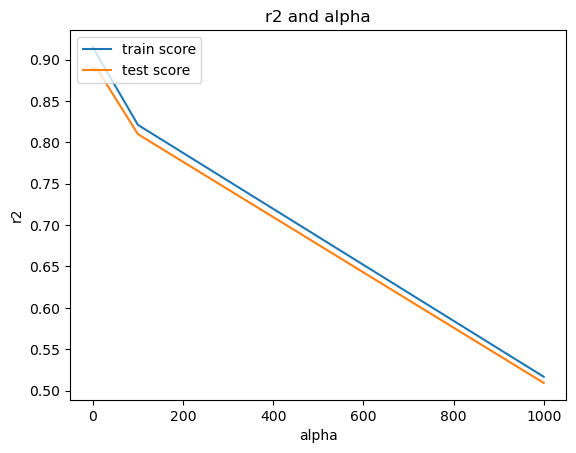

In [61]:
# plotting mean test & train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting the graph
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We se that alpha is somewhere between 0- 20 So splitling parameters according to that.

In [62]:
# list of alphas to tune
params = {'alpha': [0.001,0.01,0.02,0.03,0.05,0.06,0.07,0.08,0.09, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.05, 0.06, 0.07,
                                   0.08, 0.09, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='r2', verbose=1)

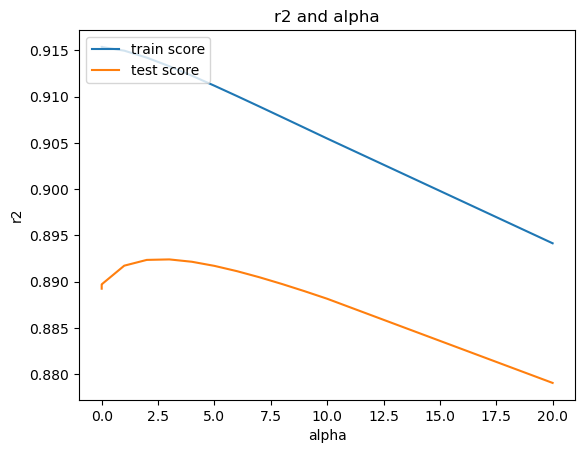

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [64]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge(alpha=3.0)
 The best r2 score is obtained at alpha 3.0


In [65]:
#optimum alpha
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.03332345,  0.12957554, -0.07611949,  0.3482059 ,  0.23956137,
        0.22898139,  0.34583847,  0.07220235,  0.06852275,  0.1036031 ,
        0.15022169,  0.0400053 , -0.09740545,  0.06768398,  0.09374486,
        0.06947015,  0.00925943,  0.03780592,  0.04241709, -0.09781087,
       -0.03204463,  0.07770916, -0.06394646, -0.05312245,  0.1405987 ,
        0.06568069,  0.08818878, -0.06534676, -0.0516692 ,  0.04397579,
        0.08952953,  0.14620477,  0.09702924,  0.05098853,  0.12914837,
       -0.02266597, -0.01971016, -0.01950066, -0.02160974, -0.02839098,
        0.02881851,  0.03367946,  0.04648521,  0.01342626,  0.02224411,
        0.0338302 , -0.05358945, -0.05595449,  0.06588341,  0.03313323,
       -0.01567966, -0.0132342 , -0.04059799, -0.0213038 ,  0.10479686,
       -0.05328352, -0.05612034,  0.08932866,  0.0502989 ,  0.04829958,
        0.03314959,  0.01454264,  0.01454264,  0.01454264,  0.01454264,
        0.05583315,  0.03971779,  0.04026392,  0.0550542 ,  0.04

In [66]:
ridge.score(X_train,y_train)

0.911714258477291

In [67]:
ridge.score(X_test,y_test)

0.8737080966658549

In [68]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [69]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.765074,10.765074
4,1stFlrSF,0.348206,0.348206
7,BsmtFullBath,0.345838,0.345838
5,2ndFlrSF,0.239561,0.239561
6,GrLivArea,0.228981,0.228981
11,WoodDeckSF,0.150222,0.150222
32,OverallCond_Above Average,0.146205,0.146205
25,Condition1_Norm,0.140599,0.140599
2,BsmtUnfSF,0.129576,0.129576
35,Exterior1st_HdBoard,0.129148,0.129148


In [70]:
# Prediction using ridge regression
from sklearn import metrics
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9117
Ridge regression test r2:  0.8737


## Lasso

In [71]:
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation system
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [72]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025010,0.012277,0.003674,0.006014,0.00006,{'alpha': 6e-05},0.909846,0.858587,0.854910,0.909869,0.915208,0.889684,0.026988,3,0.911137,0.923051,0.922007,0.911780,0.908262,0.915248,0.006071
1,0.024663,0.008748,0.003102,0.006204,0.0006,{'alpha': 0.0006},0.913994,0.857293,0.863932,0.907698,0.911532,0.890890,0.024891,1,0.906285,0.919164,0.918465,0.907952,0.904427,0.911259,0.006273
2,0.015652,0.009987,0.009583,0.007834,0.0008,{'alpha': 0.0008},0.912216,0.856957,0.863848,0.906102,0.909450,0.889714,0.024110,2,0.904316,0.917274,0.916363,0.905969,0.902603,0.909305,0.006233
3,0.021337,0.008402,0.000000,0.000000,0.001,{'alpha': 0.001},0.910336,0.856239,0.863616,0.905080,0.907016,0.888457,0.023471,4,0.902050,0.914980,0.913981,0.903883,0.900284,0.907036,0.006193
4,0.015371,0.001216,0.000000,0.000000,0.002,{'alpha': 0.002},0.901056,0.854061,0.856847,0.896788,0.893950,0.880541,0.020627,5,0.891047,0.903227,0.900980,0.892526,0.888306,0.895217,0.005827


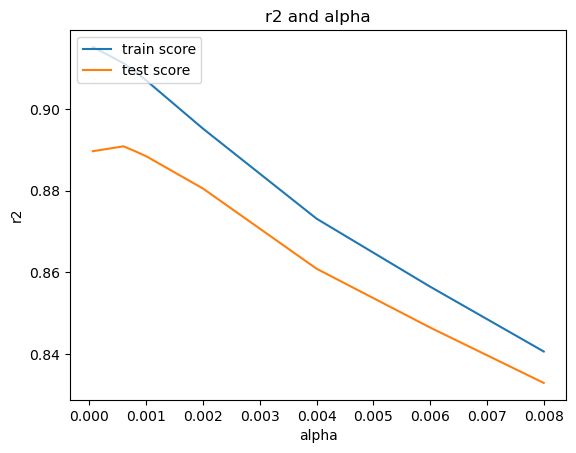

In [73]:
# plotting the mean test and training scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [74]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0006}

In [75]:
#optimum alpha
alpha = 0.0006
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0006)

In [76]:
lasso.coef_

array([ 0.01319147,  0.11802724, -0.09164557,  0.41897455,  0.06336464,
        0.09372572,  0.58453503,  0.03976521,  0.03345303,  0.10516259,
        0.14835428,  0.03393293, -0.10455303,  0.04586427,  0.06222908,
        0.06288722, -0.        ,  0.        ,  0.03411235, -0.08493643,
       -0.0191167 ,  0.07506696, -0.05534931, -0.03623974,  0.13289449,
        0.06315639,  0.06602854, -0.03959712, -0.04560039,  0.03874083,
        0.08040197,  0.1251139 ,  0.07702313,  0.03237309,  0.10961545,
       -0.        ,  0.        , -0.01539174,  0.        , -0.01725017,
        0.0028039 ,  0.00701528,  0.02086382, -0.        ,  0.01611603,
        0.03766286, -0.05099304, -0.06331377,  0.06192288,  0.03601282,
       -0.01074624, -0.00743678, -0.00773456, -0.02103158,  0.10365391,
       -0.03651019, -0.04446228,  0.09204426,  0.02083617,  0.01016359,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.04081052,  0.03240425,  0.06343275,  0.05158484,  0.01

In [77]:
lasso.score(X_train,y_train)

0.9091716189126577

In [78]:
lasso.score(X_test,y_test)

0.8727102847314243

In [79]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [80]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)  

,Feature,Coef,mod
0,LotFrontage,10.870526,10.870526
7,BsmtFullBath,0.584535,0.584535
4,1stFlrSF,0.418975,0.418975
11,WoodDeckSF,0.148354,0.148354
25,Condition1_Norm,0.132894,0.132894
32,OverallCond_Above Average,0.125114,0.125114
2,BsmtUnfSF,0.118027,0.118027
35,Exterior1st_HdBoard,0.109615,0.109615
10,GarageCars,0.105163,0.105163
13,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,-0.104553,0.104553


In [81]:
#final model 
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0006)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9091716189126577
0.8727102847314243


## Conclusion :

- we got a decent score for both Ridge and Lasso regression.
- Ridge : Train :91.1    Test :87.3
- Lasso : Train :90.9    Test :87.2

### Top 5 most significant variables in Ridge are:

- LotFrontage
- BsmtFullBath
- 1stFlrSF
- 2ndFlrSF
- GrLivArea

### Top 5 most significant variables in Lasso are:

- LotFrontage
- BsmtFullBath
- 1stFlrSF
- WoodDeckSF
- Condition1_Norm


### These Variables are directly proportional to each other.

- Optimal Value of lamda for ridge : 3
- Optimal Value of lamda for Lasso : 0.0006

### Because of Feature selection we can choose Lasso regression in this case.

<p>These variables are significant in predicting the price of a house:
    
- LotFrontage :  If the house Linear feet of street connected to property area increase then the Price increase.
    
- BsmtFullBath	: :  If the BsmtFullBath area is more the SalePrice is higher
    
- Overall Condition: If the Overall Condition is Excellent the SalePrice is higher
    
- Condition1_Norm : If Proximity to various conditions is normal the SalePrice is higher
    
- 1stFlrSF: If First Floor square feet the SalePrice is higher
    
- Exterior1st_HdBoard : If Exterior covering on house is hard board the SalePrice is higher
    
- WoodDeckSF: If Wood deck area is more the SalePrice is higher
    
- BsmtUnfSF: If Unfinished square feet of basement area is more then SalePrice is higher

- MSSubClass_1-STORY 1946 & NEWER ALL STYLES : If this type of dwelling involved in the sale the SalePrice is higher


These varibles tells about the linear relation with respect the price by which the company can improve ther sales. For instance they can concentrate in inveseting properties wich may have high SalePrice in future

##  <u><font color=purple>Subjective Questions</font></u> 

Question 1: Double the alpha values and evaluate model

In [82]:
# Model building using optimal alpha
ridge_modified = Ridge(alpha=6)
ridge_modified.fit(X_train, y_train)

Ridge(alpha=6)

In [83]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.765074,10.765074
4,1stFlrSF,0.348206,0.348206
7,BsmtFullBath,0.345838,0.345838
5,2ndFlrSF,0.239561,0.239561
6,GrLivArea,0.228981,0.228981
11,WoodDeckSF,0.150222,0.150222
32,OverallCond_Above Average,0.146205,0.146205
25,Condition1_Norm,0.140599,0.140599
2,BsmtUnfSF,0.129576,0.129576
35,Exterior1st_HdBoard,0.129148,0.129148


In [84]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Ridge Regression train r2: 0.90935637995209
Ridge Regression test r2: 0.8710584450431316


In [85]:
# Model building using optimal alpha
lasso_modified = Lasso(alpha=0.0012)
lasso_modified.fit(X_train, y_train)

Lasso(alpha=0.0012)

In [86]:
y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9022294897951901
Lasso Regression test r2: 0.8654485613391129


In [87]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,10.870526,10.870526
7,BsmtFullBath,0.584535,0.584535
4,1stFlrSF,0.418975,0.418975
11,WoodDeckSF,0.148354,0.148354
25,Condition1_Norm,0.132894,0.132894
32,OverallCond_Above Average,0.125114,0.125114
2,BsmtUnfSF,0.118027,0.118027
35,Exterior1st_HdBoard,0.109615,0.109615
10,GarageCars,0.105163,0.105163
13,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,-0.104553,0.104553


Question 3 : 
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [88]:
X_train_new = X_train.drop(['LotFrontage',
'BsmtFullBath',
'1stFlrSF',
'WoodDeckSF',
'Condition1_Norm'],axis=1)
X_test_new = X_test.drop(['LotFrontage',
'BsmtFullBath',
'1stFlrSF',
'WoodDeckSF',
'Condition1_Norm'],axis=1)

X_test_new.head()
X_train_new.shape

(1021, 65)

In [89]:
X_test_new.shape

(438, 65)

In [90]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0006),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [91]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016192,0.002184,0.006204,0.007599,0.0001,{'alpha': 0.0001},0.911040,0.852453,0.862417,0.905886,0.908518,0.888063,0.025258,1,0.905728,0.919152,0.915453,0.907161,0.904698,0.910438,0.005778
1,0.008077,0.010219,0.008233,0.006754,0.001,{'alpha': 0.001},0.909843,0.851308,0.859491,0.903049,0.901580,0.885054,0.024510,2,0.898116,0.912000,0.909031,0.900275,0.897360,0.903356,0.005997
2,0.013847,0.004010,0.000402,0.000804,0.01,{'alpha': 0.01},0.856127,0.813735,0.801120,0.820715,0.806382,0.819616,0.019422,3,0.821542,0.830743,0.834354,0.824191,0.818973,0.825961,0.005741


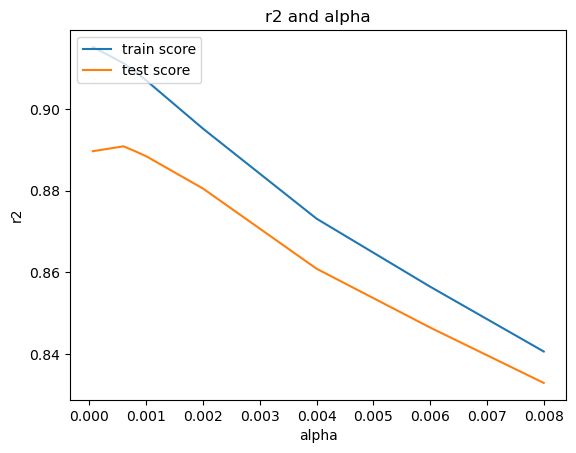

In [92]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [93]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0006}

In [95]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0006)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9054346697775688
Lasso Regression test r2: 0.870325243264113


In [96]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [97]:
#selecting the top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,LotArea,10.896802,10.896802
5,FullBath,0.625908,0.625908
3,2ndFlrSF,0.474476,0.474476
8,Age,0.151376,0.151376
21,Condition2_Norm,0.125139,0.125139
